In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("uberEats_Yelp_Restaurants.csv")

In [3]:
data.head()

,id,name,address1,address2,city,zip_code,review_count,categories,rating,price
0,2182390,Saucy Asian,5614 Bay Street,210,San Francisco,94608,22,"Asian, B, B, Q",5.0,$
1,0031423dca,Perilla - Irving St.,836 Irving Street,,San Francisco,94122,100+,"Vietnamese, Noodles, Healthy, Fast",0.0,$
2,00da776500,Begoni Bistro,615 Jackson St,,San Francisco,94133,new,"Chinese, Asian, Noodles, Dumpling",0.0,$
3,00f369d788,Royal Kitchen Indian Restaurant,175 98th Ave,,San Francisco,94603,91,"Indian, Vegetarian",5.0,$
4,0161dacdc3,Ariel's Breakfast,2845 Mission St,,San Francisco,94110,51,"Mexican, Latin",5.0,$


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            721 non-null    object 
 1   name          721 non-null    object 
 2   address1      721 non-null    object 
 3   address2      605 non-null    object 
 4   city          721 non-null    object 
 5   zip_code      721 non-null    int64  
 6   review_count  721 non-null    object 
 7   categories    721 non-null    object 
 8   rating        721 non-null    float64
 9   price         721 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 56.5+ KB


In [5]:
data.isnull().sum()

id                0
name              0
address1          0
address2        116
city              0
zip_code          0
review_count      0
categories        0
rating            0
price             0
dtype: int64

In [6]:
data.tail()

,id,name,address1,address2,city,zip_code,review_count,categories,rating,price
716,QueFVMcMlT-6aZFv2M47mg,Bottega,1132 Valencia St,NaN,San Francisco,94110,1048,"Italian, Pasta Shops, Pizza",4.3,$$
717,VtXe2cPprvvz84_x9zB8kA,Dynasty Dumpling,2786 California St,NaN,San Francisco,94115,104,"Dim Sum, Noodles",4.8,$$
718,x2djtavZIsv84ZKnz_vRMA,Beretta Divisadero,661 Divisadero St,NaN,San Francisco,94117,496,"Italian, Pizza, Breakfast &amp; Brunch",4.2,$$
719,XAYwAF_83becwNnSJDFkpA,Dumpling House,335 Noe St,NaN,San Francisco,94114,505,"Dim Sum, Asian Fusion",4.3,$$
720,ZSzXw0NgJTyOzcHwKY5eMA,Blind Butcher,4058 18th St,NaN,San Francisco,94114,339,"New American, Wine Bars",4.0,$$


Dropping address2 as it is not required for us.

In [7]:
data.drop(columns=['address2'], inplace=True)

#### Standardizing the review counts to numeric form:

In [8]:
data['review_count'].unique()

array(['22', '100+', 'new', '91', '51', '36', '13', '53', '82', '11',
       '69', '29', '30', '93', '23', '32', '12', '27', '41', '43', '83',
       '28', '40', '25', '35', '73', '47', '87', '81', '31', '44', '64',
       '15', '21', '26', '45', '14', '16', '18', '19', '79', '59', '42',
       '75', '52', '54', '37', '49', '20', '99', '46', '74', '66', '65',
       '72', '95', '17', '50', '56', '48', '39', '24', '38', '78', '62',
       '63', '71', '34', '57', '60', '33', '97', '77', '55', '76', '68',
       '96', '88', '86', '58', '70', '89', '94', '1428', '171', '350',
       '566', '130', '331', '170', '512', '698', '84', '5947', '232',
       '423', '277', '2270', '150', '139', '155', '2133', '273', '136',
       '80', '218', '347', '1919', '4390', '5456', '267', '373', '1016',
       '211', '309', '496', '461', '110', '112', '389', '1574', '1360',
       '2008', '2102', '106', '1560', '143', '3250', '129', '492', '5514',
       '196', '439', '2050', '608', '135', '2143', '782', '

In [9]:
data['review_count'] = data['review_count'].replace('new', 0)

In [10]:
data['review_count'] = pd.to_numeric(data['review_count'].replace('100+', '100'), errors='coerce')

#### Creating a 'popularity' outcome variable by binning the number of review counts:

In [11]:
bins = [0, 0.1, 100, 1000, float('inf')]
labels = ['new', 'low', 'mid', 'high']
data['popularity'] = pd.cut(data['review_count'], bins=bins, labels=labels, right=False)

In [12]:
print(data['popularity'].value_counts())

low     355
new     236
mid     108
high     22
Name: popularity, dtype: int64


### Distribution of Popularity

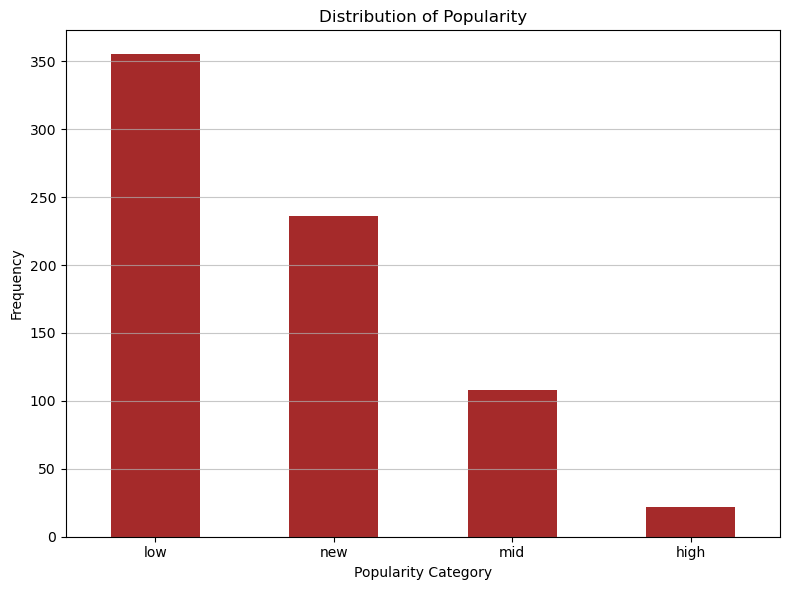

In [13]:
plt.figure(figsize=(8, 6))
data['popularity'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
data.head()

,id,name,address1,city,zip_code,review_count,categories,rating,price,popularity
0,2182390,Saucy Asian,5614 Bay Street,San Francisco,94608,22,"Asian, B, B, Q",5.0,$,low
1,0031423dca,Perilla - Irving St.,836 Irving Street,San Francisco,94122,100,"Vietnamese, Noodles, Healthy, Fast",0.0,$,mid
2,00da776500,Begoni Bistro,615 Jackson St,San Francisco,94133,0,"Chinese, Asian, Noodles, Dumpling",0.0,$,new
3,00f369d788,Royal Kitchen Indian Restaurant,175 98th Ave,San Francisco,94603,91,"Indian, Vegetarian",5.0,$,low
4,0161dacdc3,Ariel's Breakfast,2845 Mission St,San Francisco,94110,51,"Mexican, Latin",5.0,$,low


In [15]:
data['categories'].unique()

array(['Asian, B, B, Q', 'Vietnamese, Noodles, Healthy, Fast',
       'Chinese, Asian, Noodles, Dumpling', 'Indian, Vegetarian',
       'Mexican, Latin',
       'Deli, Sandwiches, Salads, Cafe, American, Group',
       'Sushi, Asian, Japanese, Group', 'Asian, Thai, Noodles',
       'Vietnamese, Noodles, Pho', 'Latin', 'Gluten', 'Asian',
       'Italian, Pizza, Exclusive', 'Indian', 'Pizza, Salads, Vegan',
       'Mediterranean, Vegetarian', 'Mediterranean, Greek, Vegetarian',
       'Chinese, Asian, Asian', 'American, Fast',
       'Asian, Noodles, Japanese', 'Mexican',
       'Vietnamese, Noodles, Healthy', 'Middle', 'American, Breakfast',
       'Pizza, American, Italian', 'Indian, Vegetarian, Asian',
       'Breakfast', 'Sandwich', 'Salads, Healthy, American',
       'Italian, Salads, Pizza', 'Asian, Rice', 'Asian, Asian',
       'Indian, Vegetarian, Asian, Healthy', 'Pizza, Wings, Family',
       'Brazilian, Coffee', 'Salvadorian, Alcohol, South',
       'Indian, North',
       'Bu

#### Grouping multiple cuisines into one category, and assiging a single cuisine type to each restaurant:

In [16]:
category_groups = {
    'Asian': ['Asian','Chinese', 'Vietnamese', 'Noodles', 'Dim Sum', 'Japanese Curry', 'Sushi', 'Asian Fusion', 'Laotian'],
    'Indian': ['Indian', 'Curry', 'Naan', 'Biryani', 'Nepalese', 'Pakistani'],
    'Mexican': ['Mexican', 'Tacos', 'Burritos'],
    'Italian': ['Italian', 'Pasta', 'Pizza'],
    'American': ['New American', 'Burgers', 'Steakhouses', 'Southern', 'Breakfast & Brunch', 'BBQ', 'B,B,Q'],
    'Desserts': ['Desserts', 'Ice Cream & Frozen Yogurt', 'Bakery', 'Pastry'],
    'Drinks': ['Drinks', 'Beer', 'Wine & Spirits', 'Juice', 'Coffee & Tea', 'Cocktail Bars', 'Wine Bars'],
    'Fast Food': ['Fast Food', 'Street', 'Breakfast', 'Fast', 'Hot Dogs'],
    'Middle Eastern': ['Middle Eastern', 'Arabic', 'Turkish', 'Halal', 'Persian/Iranian'],
    'Healthy': ['Healthy', 'Salads', 'Vegetarian', 'Gluten', 'Soups'],
    'Comfort Food': ['Comfort Food', 'Steak', 'American', 'Macarons', 'Hot Pot'],
    'Others': ['Family', 'Seafood', 'Barbeque', 'French', 'Mediterranean', 'Russian', 'Brazilian']
}

def assign_category_group(category):
    for group, categories in category_groups.items():
        for cat in categories:
            if cat in category:
                return group
    return 'Others'

data['category_group'] = data['categories'].apply(assign_category_group)

print(data['category_group'].unique())

['Asian' 'Indian' 'Mexican' 'Healthy' 'Others' 'Italian' 'Fast Food'
 'American' 'Drinks' 'Comfort Food' 'Desserts' 'Middle Eastern']


In [17]:
data.head()

,id,name,address1,city,zip_code,review_count,categories,rating,price,popularity,category_group
0,2182390,Saucy Asian,5614 Bay Street,San Francisco,94608,22,"Asian, B, B, Q",5.0,$,low,Asian
1,0031423dca,Perilla - Irving St.,836 Irving Street,San Francisco,94122,100,"Vietnamese, Noodles, Healthy, Fast",0.0,$,mid,Asian
2,00da776500,Begoni Bistro,615 Jackson St,San Francisco,94133,0,"Chinese, Asian, Noodles, Dumpling",0.0,$,new,Asian
3,00f369d788,Royal Kitchen Indian Restaurant,175 98th Ave,San Francisco,94603,91,"Indian, Vegetarian",5.0,$,low,Indian
4,0161dacdc3,Ariel's Breakfast,2845 Mission St,San Francisco,94110,51,"Mexican, Latin",5.0,$,low,Mexican


In [18]:
data['zip_code'].unique()

array([94608, 94122, 94133, 94603, 94110, 94115, 94109, 94606, 94114,
       94102, 94121, 94117, 94124, 94112, 94116, 94103, 94618, 94107,
       94105, 94704, 94123, 94118, 94602, 94080, 94104, 94612, 94108,
       94015, 94709, 94611, 94702, 94705, 94501, 94710,     0, 94111,
       94965, 94541, 94014, 94706, 94010, 94158, 94607, 94127, 94601,
       94403, 94941, 94134, 94609, 94804, 94925, 94707, 94066, 94131,
       94030, 94610, 94044, 94143, 94401, 94132, 94530, 94568, 94577,
       94596, 94621, 94901, 94129])

#### Let us scrape the mapping data of Zip Codes to Neighborhood from http://www.healthysf.org/bdi/outcomes/zipmap

In [19]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent' : 'Mozilla/5.0'}

url = 'http://www.healthysf.org/bdi/outcomes/zipmap.htm'
page = requests.get(url, headers)

soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   SF ZIP Map
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body bgcolor="#FFFFFF" leftmargin="0" marginheight="0" marginwidth="0" topmargin="0">
  <table border="0" cellpadding="4" cellspacing="0" width="100%">
   <tr>
    <td bgcolor="#666666" rowspan="2">
     <a href="../more/101grove.html">
      <img border="0" height="75" src="../images/101logo.jpg" width="100"/>
     </a>
    </td>
    <td bgcolor="#666666" width="100%">
     <font color="#CCCCCC" face="Arial, Helvetica, sans-serif" size="4">
      <strong>
       San 

      Francisco Burden of Disease &amp; Injury Study:
       <br/>
      </strong>
      <strong>
       Determinants of Health
      </strong>
     </font>
    </td>
   </tr>
   <tr>
    <td>
     <table border="0" cellpadding="2" cellspacing="1" width="100%">
      <tr>
       <td align="center" bgcolor="#CCCCCC" width="20%">
        <font color="#000000" face="Arial, Helvetica, sans-serif

In [20]:
zip_neighborhood_map = {}
for idx, row in enumerate(soup.find_all('tr')):
    if idx == 0:
        continue
    columns = row.find_all('td')
    if len(columns) == 2:
        zip_code_element = columns[0].find('a')
        neighborhood_element = columns[1].find('font')
        if zip_code_element and neighborhood_element:
            zip_code = zip_code_element.text.strip()
            neighborhood = neighborhood_element.text.strip().replace('\n', ' ')
            neighborhood = re.sub(r'\s+', ' ', neighborhood)
            if not neighborhood.startswith('(all'):
                zip_neighborhood_map[zip_code] = neighborhood

print(zip_neighborhood_map)

{'94102': 'Hayes Valley/Tenderloin/North of Market', '94103': 'South of Market', '94107': 'Potrero Hill', '94108': 'Chinatown', '94109': 'Polk/Russian Hill (Nob Hill)', '94110': 'Inner Mission/Bernal Heights', '94112': 'Ingelside-Excelsior/Crocker-Amazon', '94114': 'Castro/Noe Valley', '94115': 'Western Addition/Japantown', '94116': 'Parkside/Forest Hill', '94117': 'Haight-Ashbury', '94118': 'Inner Richmond', '94121': 'Outer Richmond', '94122': 'Sunset', '94123': 'Marina', '94124': 'Bayview-Hunters Point', '94127': 'St. Francis Wood/Miraloma/West Portal', '94131': 'Twin Peaks-Glen Park', '94132': 'Lake Merced', '94133': 'North Beach/Chinatown', '94134': 'Visitacion Valley/Sunnydale'}


#### Identifying zip codes that have not been mapped:

In [21]:
neighborhoods = []
for zip_code in zip_codes:
    neighborhood = zip_neighborhood_map.get(str(zip_code), "Unknown")
    neighborhoods.append(neighborhood)

df = pd.DataFrame({"Zip Code": zip_codes, "Neighborhood": neighborhoods})

unmatched_zips = df[df['Neighborhood'] == 'Unknown']['Zip Code'].unique()
print("Unmatched ZIP Codes:", unmatched_zips)

Unmatched ZIP Codes: [94608 94603 94606 94618 94105 94704 94602 94080 94104 94612 94015 94709
 94611 94702 94705 94501 94710     0 94111 94965 94541 94014 94706 94010
 94158 94607 94601 94403 94941 94609 94804 94925 94707 94066 94030 94610
 94044 94143 94401 94530 94568 94577 94596 94621 94901 94129]


In [22]:
df[df['Neighborhood'] == 'Unknown'].shape[0]

46

#### Looks like we have many zip codes that are not covered since they are from areas outside Downtown San Francisco (like San Mateo, Daly City, etc.). Let's try extracting from another website which has other bay area zip codes and expand our current dictionary.

In [23]:
url1 = 'https://www.bestplaces.net/find/zip.aspx?msa=41860&st=CA'
page1 = requests.get(url1, headers)

soup1 = BeautifulSoup(page1.content, 'html.parser')
print(soup1.prettify())

<!DOCTYPE html>
<html xmlns="//www.w3.org/1999/xhtml">
 <head>
  <script async="" data-ad-client="ca-pub-8348531667164181" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <link href="//www.bestplaces.net/css/bpstyle.css" rel="stylesheet"/>
  <!-- Google Tag Manager -->
  <script>
   (function (w, d, s, l, i) {
w[l] = w[l] || []; w[l].push({
'gtm.start':
new Date().getTime(), event: 'gtm.js'
}); var f = d.getElementsByTagName(s)[0],
j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : ''; j.async = true; j.src =
'//www.googletagmanager.com/gtm.js?id=' + i + dl; f.parentNode.insertBefore(j, f);
})(window, document, 'script', 'dataLayer', 'GTM-56ZQ3X');
  </script>
  <!-- End Google Tag Manager -->
  <meta content="BestPlaces" name="og:site_name"/>
  <title>
   San Francisco-Oakland-Berkeley Metro Area, California: 175 Zip Codes
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="Best Places to Live 

In [24]:
zip_neighborhoods = {}
for u_tag in soup1.find_all('u'):
    zip_code, _, neighborhood = u_tag.text.strip().partition(' (')
    if zip_code.isdigit():
        neighborhood = neighborhood[:-1]
        zip_neighborhoods[zip_code] = neighborhood

print(zip_neighborhoods)

{'94002': 'Belmont', '94005': 'Brisbane', '94010': 'Burlingame', '94014': 'Daly City', '94015': 'Daly City', '94019': 'Half Moon Bay', '94020': 'La Honda', '94021': 'Loma Mar', '94025': 'Menlo Park', '94027': 'Atherton', '94028': 'Portola Valley', '94030': 'Millbrae', '94037': 'Montara', '94038': 'Moss Beach', '94044': 'Pacifica', '94060': 'Pescadero', '94061': 'Redwood City', '94062': 'Redwood City', '94063': 'Redwood City', '94065': 'Redwood City', '94066': 'San Bruno', '94070': 'San Carlos', '94074': 'San Gregorio', '94080': 'South San Francisco', '94102': 'San Francisco', '94103': 'San Francisco', '94104': 'San Francisco', '94105': 'San Francisco', '94107': 'San Francisco', '94108': 'San Francisco', '94109': 'San Francisco', '94110': 'San Francisco', '94111': 'San Francisco', '94112': 'San Francisco', '94114': 'San Francisco', '94115': 'San Francisco', '94116': 'San Francisco', '94117': 'San Francisco', '94118': 'San Francisco', '94121': 'San Francisco', '94122': 'San Francisco', '

#### Removing those which have San Francico, since we already have them.

In [25]:
zip_neighborhoods_filtered = {k: v for k, v in zip_neighborhoods.items() if "San Francisco" not in v}
print(zip_neighborhoods_filtered)

{'94002': 'Belmont', '94005': 'Brisbane', '94010': 'Burlingame', '94014': 'Daly City', '94015': 'Daly City', '94019': 'Half Moon Bay', '94020': 'La Honda', '94021': 'Loma Mar', '94025': 'Menlo Park', '94027': 'Atherton', '94028': 'Portola Valley', '94030': 'Millbrae', '94037': 'Montara', '94038': 'Moss Beach', '94044': 'Pacifica', '94060': 'Pescadero', '94061': 'Redwood City', '94062': 'Redwood City', '94063': 'Redwood City', '94065': 'Redwood City', '94066': 'San Bruno', '94070': 'San Carlos', '94074': 'San Gregorio', '94401': 'San Mateo', '94402': 'San Mateo', '94403': 'San Mateo', '94404': 'Foster City', '94501': 'Alameda', '94502': 'Alameda', '94505': 'Discovery Bay', '94506': 'Danville', '94507': 'Alamo', '94509': 'Antioch', '94511': 'Bethel Island', '94513': 'Brentwood', '94514': 'Byron', '94516': 'Canyon', '94517': 'Clayton', '94518': 'Concord', '94519': 'Concord', '94520': 'Concord', '94521': 'Concord', '94523': 'Pleasant Hill', '94525': 'Crockett', '94526': 'Danville', '94528'

#### Merging the dictionaries:

In [26]:
zip_neighborhood_map.update(zip_neighborhoods_filtered)
print(zip_neighborhood_map)

{'94102': 'Hayes Valley/Tenderloin/North of Market', '94103': 'South of Market', '94107': 'Potrero Hill', '94108': 'Chinatown', '94109': 'Polk/Russian Hill (Nob Hill)', '94110': 'Inner Mission/Bernal Heights', '94112': 'Ingelside-Excelsior/Crocker-Amazon', '94114': 'Castro/Noe Valley', '94115': 'Western Addition/Japantown', '94116': 'Parkside/Forest Hill', '94117': 'Haight-Ashbury', '94118': 'Inner Richmond', '94121': 'Outer Richmond', '94122': 'Sunset', '94123': 'Marina', '94124': 'Bayview-Hunters Point', '94127': 'St. Francis Wood/Miraloma/West Portal', '94131': 'Twin Peaks-Glen Park', '94132': 'Lake Merced', '94133': 'North Beach/Chinatown', '94134': 'Visitacion Valley/Sunnydale', '94002': 'Belmont', '94005': 'Brisbane', '94010': 'Burlingame', '94014': 'Daly City', '94015': 'Daly City', '94019': 'Half Moon Bay', '94020': 'La Honda', '94021': 'Loma Mar', '94025': 'Menlo Park', '94027': 'Atherton', '94028': 'Portola Valley', '94030': 'Millbrae', '94037': 'Montara', '94038': 'Moss Beac

In [27]:
zip_codes = data['zip_code'].unique()

neighborhoods = []

for zip_code in zip_codes:
    neighborhood = zip_neighborhood_map.get(str(zip_code), "Unknown")
    neighborhoods.append(neighborhood)

df = pd.DataFrame({"Zip Code": zip_codes, "Neighborhood": neighborhoods})

unmatched_zips = df[df['Neighborhood'] == 'Unknown']['Zip Code'].unique()
print("Unmatched ZIP Codes:", unmatched_zips)

Unmatched ZIP Codes: [94105 94080 94104     0 94111 94158 94143 94129]


#### Manually adding the leftout neighborhoods:

In [28]:
additional_zip_neighborhoods = {
    '94105': 'Financial District',
    '94080': 'South San Francisco',
    '94104': 'Chinatown',
    '0': 'Unknown',
    '94111': 'Embarcadero',
    '94158': 'Misson Bay',
    '94143': 'UCSF Parnassus',
    '94129': 'Presidio'
}

zip_neighborhood_map.update(additional_zip_neighborhoods)

print(zip_neighborhood_map)

{'94102': 'Hayes Valley/Tenderloin/North of Market', '94103': 'South of Market', '94107': 'Potrero Hill', '94108': 'Chinatown', '94109': 'Polk/Russian Hill (Nob Hill)', '94110': 'Inner Mission/Bernal Heights', '94112': 'Ingelside-Excelsior/Crocker-Amazon', '94114': 'Castro/Noe Valley', '94115': 'Western Addition/Japantown', '94116': 'Parkside/Forest Hill', '94117': 'Haight-Ashbury', '94118': 'Inner Richmond', '94121': 'Outer Richmond', '94122': 'Sunset', '94123': 'Marina', '94124': 'Bayview-Hunters Point', '94127': 'St. Francis Wood/Miraloma/West Portal', '94131': 'Twin Peaks-Glen Park', '94132': 'Lake Merced', '94133': 'North Beach/Chinatown', '94134': 'Visitacion Valley/Sunnydale', '94002': 'Belmont', '94005': 'Brisbane', '94010': 'Burlingame', '94014': 'Daly City', '94015': 'Daly City', '94019': 'Half Moon Bay', '94020': 'La Honda', '94021': 'Loma Mar', '94025': 'Menlo Park', '94027': 'Atherton', '94028': 'Portola Valley', '94030': 'Millbrae', '94037': 'Montara', '94038': 'Moss Beac

#### Mapping the dataset to the dictionary.

In [29]:
data['Neighborhood'] = data['zip_code'].astype(str).map(zip_neighborhood_map)

In [30]:
data['Neighborhood'].unique()

array(['Oakland', 'Sunset', 'North Beach/Chinatown',
       'Inner Mission/Bernal Heights', 'Western Addition/Japantown',
       'Polk/Russian Hill (Nob Hill)', 'Castro/Noe Valley',
       'Hayes Valley/Tenderloin/North of Market', 'Outer Richmond',
       'Haight-Ashbury', 'Bayview-Hunters Point',
       'Ingelside-Excelsior/Crocker-Amazon', 'Parkside/Forest Hill',
       'South of Market', 'Potrero Hill', 'Financial District',
       'Berkeley', 'Marina', 'Inner Richmond', 'South San Francisco',
       'Chinatown', 'Daly City', 'Alameda', 'Unknown', 'Embarcadero',
       'Sausalito', 'Hayward', 'Albany', 'Burlingame', 'Misson Bay',
       'St. Francis Wood/Miraloma/West Portal', 'San Mateo',
       'Mill Valley', 'Visitacion Valley/Sunnydale', 'Richmond',
       'Corte Madera', 'San Bruno', 'Twin Peaks-Glen Park', 'Millbrae',
       'Pacifica', 'UCSF Parnassus', 'Lake Merced', 'El Cerrito',
       'Dublin', 'San Leandro', 'Walnut Creek', 'San Rafael', 'Presidio'],
      dtype=object)

#### Now we have properly mapped all the zipcodes to a particular neighborhood, without any unknown cases.

### Distribution of Restaurant Ratings

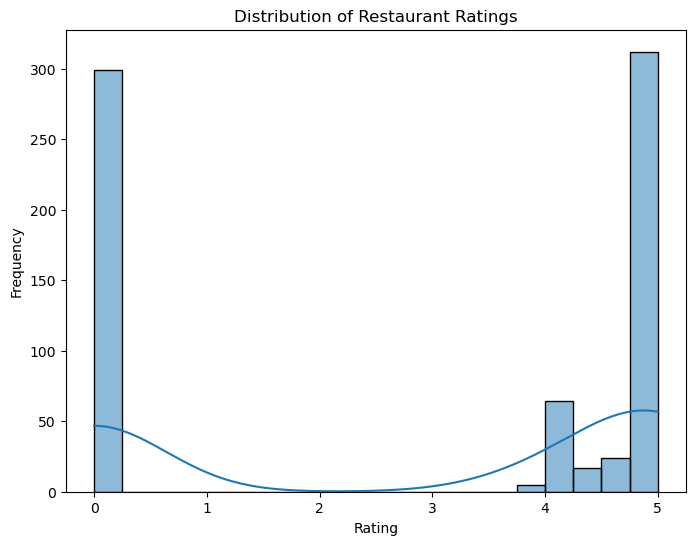

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='rating', bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We can see that the restaurant ratings are either not given (0 rating), or is close to 4 & 5.

### Top 10 Popular Cuisine Types

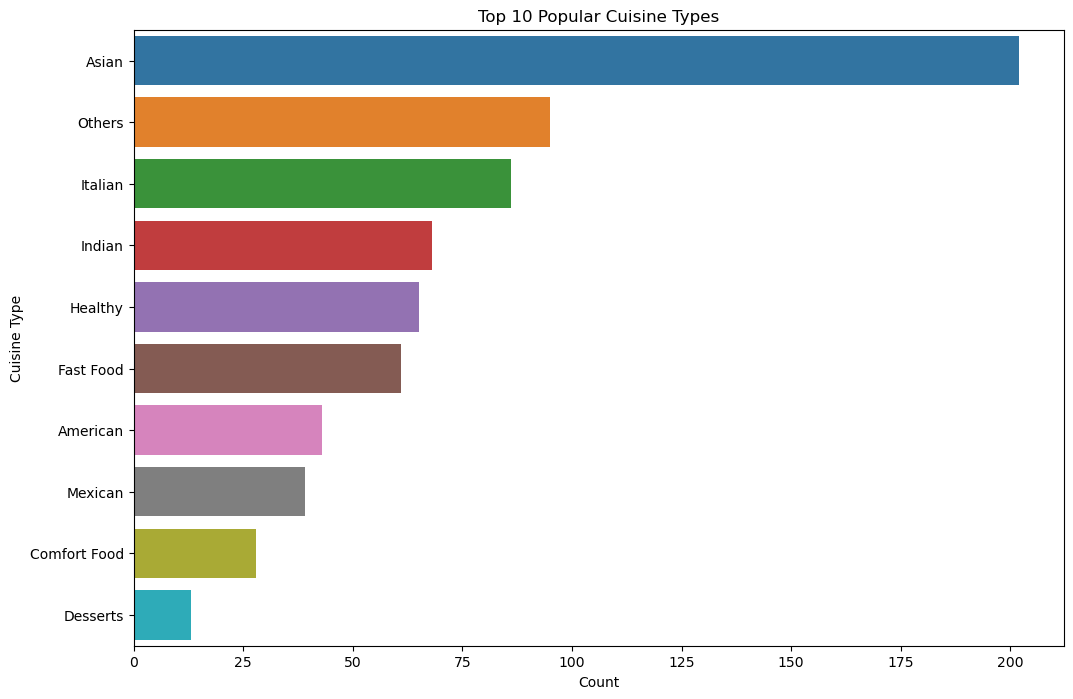

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='category_group', order=data['category_group'].value_counts().index[:10])
plt.title('Top 10 Popular Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

We can see that the Asian Cuisine is the most popular in this area, followed by Indian, Italian, Healthy and Others. Incorporating dishes from these cuisines could prove to be beneficial for a restaurant business.

### Average Ratings by Neighborhood

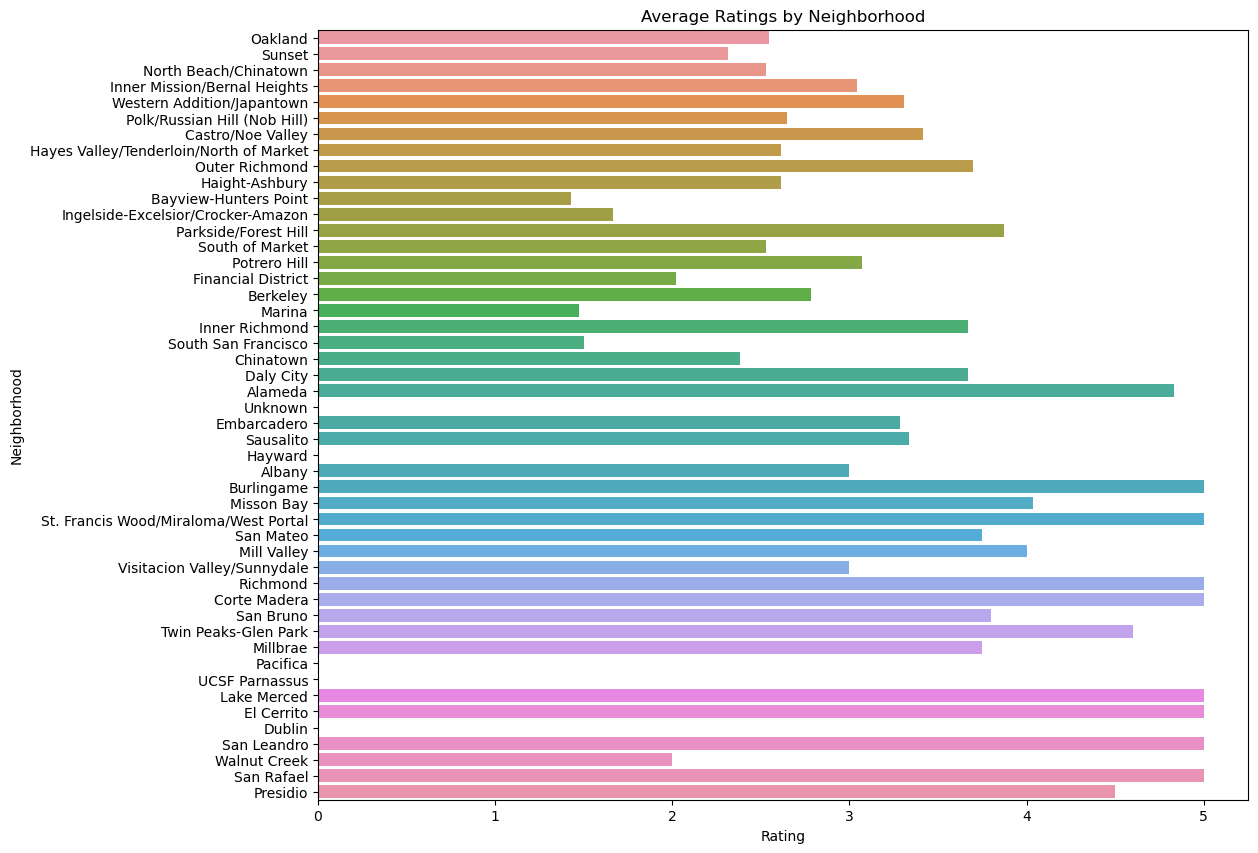

In [33]:
plt.figure(figsize=(12, 10))
sns.barplot(data=data, y='Neighborhood', x='rating', ci=None)
plt.title('Average Ratings by Neighborhood')
plt.xlabel('Rating')
plt.ylabel('Neighborhood')
plt.show()

This visualization shows us how highly rated restaurants are distributed across different neighborhoods. This can help a restaurant business come up strategies to choose the right location.

### Ratings Distribution by Price

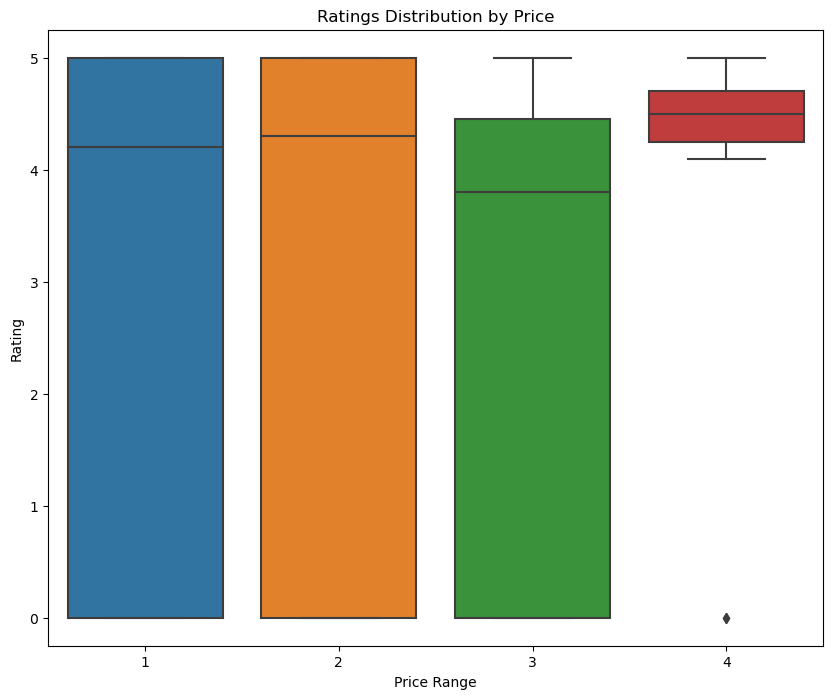

In [34]:
data['price'] = data['price'].str.len()
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='price', y='rating')
plt.title('Ratings Distribution by Price')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

Looks like all of the most expensive restaurants have been rated. This gives us an insight about consumer behaviour. Those who tend to dine at expensive restaurants are more likely to rate them. We can test this further if required, but this is an interesting insight.

### Most Popular Cuisines in Different Neighborhoods

In [35]:
cuisine_count = data.groupby(['Neighborhood', 'category_group']).size().reset_index(name='count')
max_count = cuisine_count.groupby('Neighborhood')['count'].idxmax()
popular = cuisine_count.loc[max_count]

print(popular)

                                Neighborhood  category_group  count
0                                    Alameda           Asian      2
5                                     Albany          Indian      2
6                      Bayview-Hunters Point           Asian      3
14                                  Berkeley          Indian      9
18                                Burlingame           Asian      1
20                         Castro/Noe Valley           Asian      8
31                                 Chinatown           Asian     14
38                              Corte Madera           Asian      1
41                                 Daly City           Asian      3
45                                    Dublin    Comfort Food      1
47                                El Cerrito          Others      1
52                               Embarcadero          Others      2
57                        Financial District         Healthy      3
62                            Haight-Ashbury    

This shows us the most popular cuisines in each neighborhoods. This can be particularly helpful in choosing the restaurant cuisine based on the area.

## Logistic Regression

In [36]:
X = data[['rating', 'price', 'category_group', 'Neighborhood']]
y = data['popularity']

X_encoded = pd.get_dummies(X, columns=['category_group', 'Neighborhood'])

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 13)

logistic = LogisticRegression(max_iter = 1000, random_state = 13)
logistic.fit(X_train_encoded, y_train)

y_pred_logistic = logistic.predict(X_test_encoded)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Accuracy: 0.7862068965517242
Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         7
         low       0.94      0.97      0.95        74
         mid       0.42      0.30      0.35        27
         new       0.69      0.92      0.79        37

    accuracy                           0.79       145
   macro avg       0.51      0.55      0.52       145
weighted avg       0.73      0.79      0.75       145



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The logistic regression model predicts the popularity of restaurants with an accuracy of 78.6%. The model performs well for predicting "low" and "new" popularity restaurants, but it struggles with "high" and "mid" popularity categories. This can be accounted to the fact that number of restaurants in the mid and high categories are much lesser than the other two.

## Decision Tree Classification

In [37]:
decision_tree = DecisionTreeClassifier(random_state = 13)
decision_tree.fit(X_train_encoded, y_train)

y_pred_decision_tree = decision_tree.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred_decision_tree)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

Accuracy: 0.7517241379310344
Classification Report:
               precision    recall  f1-score   support

        high       0.33      0.14      0.20         7
         low       0.95      0.93      0.94        74
         mid       0.39      0.48      0.43        27
         new       0.72      0.70      0.71        37

    accuracy                           0.75       145
   macro avg       0.60      0.56      0.57       145
weighted avg       0.76      0.75      0.75       145



The decision tree model predicts the popularity of restaurants with an accuracy of 75.17%, slightly lesser than logistic regression. The model performs well for predicting "low" and "new" popularity restaurants, but it struggles with "high" and "mid" popularity categories. This can be accounted to the fact that number of restaurants in the mid and high categories are much lesser than the other two, just as mentioned above.

## Random Forest Classification

In [38]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 13)
rf.fit(X_train_encoded, y_train)

y_pred_rf = rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7448275862068966
Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         7
         low       0.92      0.96      0.94        74
         mid       0.35      0.33      0.34        27
         new       0.70      0.76      0.73        37

    accuracy                           0.74       145
   macro avg       0.49      0.51      0.50       145
weighted avg       0.71      0.74      0.73       145



The random forest model predicts the popularity of restaurants with an accuracy of 74.4%, slightly lesser than the decision tree model. The model performs well for predicting "low" and "new" popularity restaurants, but it struggles with "high" and "mid" popularity categories. This can be accounted to the fact that number of restaurants in the mid and high categories are much lesser than the other two, just as mentioned earlier.

#### Calculating the feature importance scores:

In [39]:
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for f in range(X_train_encoded.shape[1]):
    print(f"{f + 1}. Feature '{X_train_encoded.columns[indices[f]]}': {feature_importances[indices[f]]}")

Feature ranking:
1. Feature 'rating': 0.4184630067637976
2. Feature 'price': 0.10141210070175449
3. Feature 'category_group_Asian': 0.03143499248168809
4. Feature 'Neighborhood_North Beach/Chinatown': 0.02648365893941005
5. Feature 'category_group_Italian': 0.025917426991311485
6. Feature 'category_group_Drinks': 0.02133064442919086
7. Feature 'Neighborhood_Western Addition/Japantown': 0.02133020081486585
8. Feature 'category_group_Others': 0.020399345404364947
9. Feature 'Neighborhood_Haight-Ashbury': 0.02002983020597708
10. Feature 'Neighborhood_Inner Mission/Bernal Heights': 0.01939188359670215
11. Feature 'Neighborhood_Polk/Russian Hill (Nob Hill)': 0.01897888753717638
12. Feature 'Neighborhood_Hayes Valley/Tenderloin/North of Market': 0.016294549008461227
13. Feature 'Neighborhood_Inner Richmond': 0.01563684660456017
14. Feature 'Neighborhood_South of Market': 0.014756936066192545
15. Feature 'category_group_American': 0.014199805070810758
16. Feature 'Neighborhood_Castro/Noe Vall

It is clearly evident that the top 3 features are the Ratings of the restaurant, Pricing of the restaurant and if the cuisine is Asian or not (as it is the most popular one in SF as we saw earlier).

#### Plotting the feature importances:

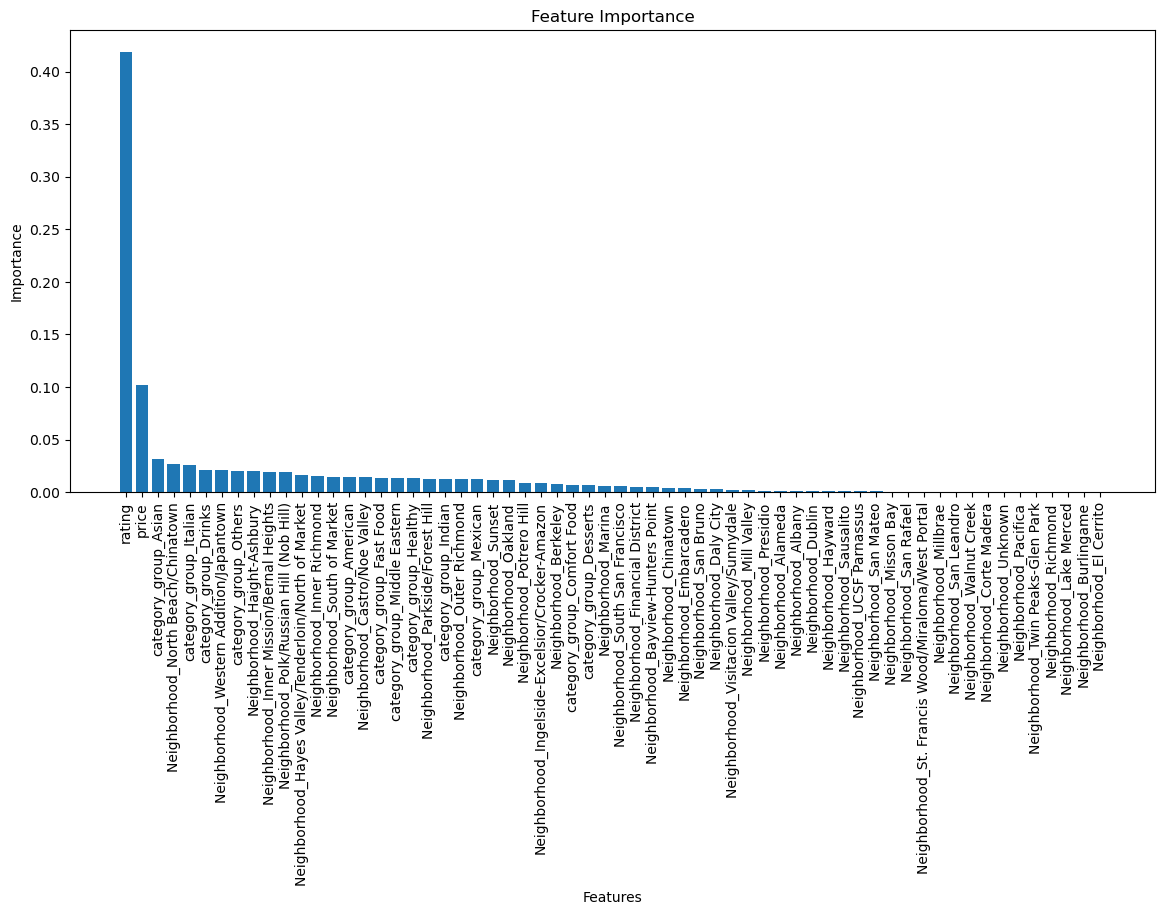

In [40]:
plt.figure(figsize=(14, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_encoded.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#### Hyperparameter Tuning using Grid Search:

In [41]:
grid = {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20, 30]}

rf = RandomForestClassifier(random_state = 13)

grid_search = GridSearchCV(estimator = rf, param_grid = grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)

best_params = grid_search.best_params_

best_rf = RandomForestClassifier(random_state = 13, **best_params)
best_rf.fit(X_train_encoded, y_train)

y_pred_best_rf = best_rf.predict(X_test_encoded)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print("Accuracy:", accuracy_best_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         7
         low       0.95      0.96      0.95        74
         mid       0.50      0.41      0.45        27
         new       0.72      0.92      0.81        37

    accuracy                           0.80       145
   macro avg       0.54      0.57      0.55       145
weighted avg       0.76      0.80      0.78       145



After tuning the hyperparameters, the accuracy has significantly improved from 74.4% to 80%. Comparing all the other models, this seems to be the best performing model. The precision scores are also better in this case.